# Baseline Controller Analysis

## Simulation Setup

In [1]:
from simglucose.simulation.env import T1DSimEnv
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.sim_engine import SimObj
from datetime import datetime

# from src.environments.env_loader import get_default_patients

def generate_sim_objs(sim_time: int, start_time: datetime, patients: list[str], controller, save_path: str):
	sim_objs = []

	for patient_name in patients:
		# Create a simulation environment
		patient = T1DPatient.withName(patient_name)
		sensor = CGMSensor.withName('Dexcom', seed=1)
		pump = InsulinPump.withName('Insulet')
		scenario = RandomScenario(start_time=start_time, seed=42)
		env = T1DSimEnv(patient, sensor, pump, scenario)
		# Put them together to create a simulation object
		sim_objs.append(
			SimObj(env, controller, sim_time, animate=False, path=save_path)
		)

	return sim_objs

### Set experiment parameters

In [2]:
def get_default_patients():
    """Return a list of default patient names that are referenced from [simglucose](https://github.com/Blood-Glucose-Control/rl-insulin-pump/blob/main/simglucose/simglucose/params/vpatient_params.csv)."""
    patients = []

    # Add adolescent patients (typically 001-010)
    for i in range(1, 11):
        patients.append(f"adolescent#{i:03d}")

    # Add adult patients (typically 001-010)
    for i in range(1, 11):
        patients.append(f"adult#{i:03d}")

    # Add child patients (typically 001-010)
    for i in range(1, 11):
        patients.append(f"child#{i:03d}")

    print(f"Using {len(patients)} default patients")
    return patients

In [3]:
from datetime import timedelta

now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())
sim_time = timedelta(days=3)
patients = get_default_patients()

Using 30 default patients


## Basal Bolus Controller

In [ ]:
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.simulation.sim_engine import batch_sim

base_path = "./results/basal_bolus"
predict_path = f"{base_path}/predict"
analysis_path = f"{base_path}/analysis"

controller = BBController()

sim_objs = generate_sim_objs(sim_time=sim_time, start_time=start_time, patients=patients, controller=controller, save_path=base_path)

batch_sim(sim_objs, parallel=True)

Process ID: 80170
Simulation starts ...
Process ID: 80171
Simulation starts ...
Process ID: 80172
Simulation starts ...
Process ID: 80173
Simulation starts ...
Process ID: 80174
Simulation starts ...
Process ID: 80175
Simulation starts ...
Process ID: 80176Process ID: 80177
Simulation starts ...

Simulation starts ...
Simulation Completed!
Process ID: 80170

Simulation starts ...Simulation Completed!
Process ID: 80173
Simulation starts ...
Simulation Completed!
Process ID: 80171
Simulation starts ...
Simulation Completed!
Simulation Completed!
Process ID: 80176
Simulation starts ...
Process ID: 80172
Simulation starts ...
Simulation Completed!
Process ID: 80177
Simulation starts ...
Simulation Completed!
Process ID: 80175
Simulation starts ...
Simulation Completed!
Process ID: 80174
Simulation starts ...
Simulation Completed!
Simulation Completed!
Process ID: 80171
Simulation starts ...
Process ID: 80177
Simulation starts ...
Simulation Completed!
Process ID: 80170
Simulation starts ..

[                             BG         CGM  CHO   insulin      LBGI  \
 Time                                                                   
 2025-10-23 00:00:00  149.020000  165.793949  0.0  0.013933  0.000000   
 2025-10-23 00:03:00  149.020000  161.582022  0.0  0.013933  0.000000   
 2025-10-23 00:06:00  149.020000  159.239373  0.0  0.013933  0.000000   
 2025-10-23 00:09:00  149.020000  157.472710  0.0  0.013933  0.000000   
 2025-10-23 00:12:00  149.020000  156.108950  0.0  0.013933  0.000000   
 ...                         ...         ...  ...       ...       ...   
 2025-10-25 23:48:00   90.658044   89.837117  0.0  0.013933  1.614260   
 2025-10-25 23:51:00   91.148347   88.283058  0.0  0.013933  1.534804   
 2025-10-25 23:54:00   91.633258   87.029963  0.0  0.013933  1.458590   
 2025-10-25 23:57:00   92.112140   86.397083  0.0  0.013933  1.385602   
 2025-10-26 00:00:00   92.584549   86.521365  NaN       NaN  1.315785   
 
                          HBGI      Risk  
 Time 

Process ID: 80171
Simulation starts ...Process ID: 80174

Simulation starts ...
Process ID: 80177Process ID: 80170

Process ID: 80175Simulation starts ...Simulation starts ...

Process ID: 80176
Process ID: 80173Simulation starts ...

Simulation starts ...

Simulation starts ...
Process ID: 80172
Simulation starts ...
Simulation Completed!
Process ID: 80171
Simulation starts ...
Simulation Completed!
Simulation Completed!
Process ID: 80172
Simulation starts ...
Process ID: 80170

Simulation starts ...Simulation Completed!
Process ID: 80175
Simulation starts ...
Simulation Completed!
Process ID: 80177
Simulation starts ...
Simulation Completed!
Process ID: 80173

Simulation starts ...Simulation Completed!
Process ID: 80174
Simulation starts ...
Simulation Completed!
Process ID: 80176
Simulation starts ...
Simulation Completed!
Simulation Completed!
Process ID: 80170
Simulation starts ...
Process ID: 80171
Simulation starts ...
Simulation Completed!
Process ID: 80175
Simulation starts ..

In [5]:
import logging
import pandas as pd
from simglucose.analysis.report import report

def sg_analyze(files_path=None, save_path=None):
    """
    Analyze saved trajectories and generate a report.

    This function processes CSV files containing patient glucose data,
    combines them, and generates a standardized report in PDF format.
    The report includes key metrics and visualizations.

    Args:
        files_path (str): Path to the directory containing saved trajectory files.
        save_path (str, optional): Path to save the generated report. If None,
            a timestamped report will be created in the reporting directory.

    Returns:
        Path: The path to the generated report file.

    Raises:
        FileNotFoundError: If no CSV files are found in the specified directory.
    """
    logger = logging.getLogger(__name__)
    logger.info("Analyzing saved trajectories...")
    from pathlib import Path

    try:
        path = Path(__file__).parent.parent.parent
    except NameError:
        path = Path.cwd()
    # Ensure files_path exists and contains CSV files
    if files_path is None:
        print("No files_path provided, using simglucose example to generate report.")
        result_path = path / "results/simglucose_reports/example_data"
    else:
        result_path = (
            Path(files_path) if not isinstance(files_path, Path) else files_path
        )

    result_filenames = list(result_path.glob("*.csv"))

    if not result_filenames:
        raise FileNotFoundError(f"No CSV files found in {result_path}")

    patient_names = [f.stem for f in result_filenames]
    df = pd.concat(
        [pd.read_csv(str(f), index_col=0) for f in result_filenames],
        keys=patient_names,
    )

    # Handle save_path directory creation
    if save_path is None:
        datetimestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        save_path = Path(f"results/simglucose_reports/report_{datetimestamp}")
        save_path.mkdir(parents=False, exist_ok=False)
    else:
        save_path = Path(save_path)
        # Ensure the directory exists
        save_path.parent.mkdir(parents=True, exist_ok=True)

    # Generate the report
    print(str(save_path))
    print(df)
    print(df.value_counts())
    report(df, save_path=str(save_path))
    logger.info(f"Report saved to {save_path}")

    return save_path


### Run analysis

results/basal_bolus/analysis
                                       BG         CGM  CHO   insulin  \
          Time                                                         
adult#009 2025-10-23 00:00:00  145.080000  161.853949  0.0  0.018900   
          2025-10-23 00:03:00  145.080000  157.642022  0.0  0.018900   
          2025-10-23 00:06:00  145.080000  155.299373  0.0  0.018900   
          2025-10-23 00:09:00  145.080000  153.532710  0.0  0.018900   
          2025-10-23 00:12:00  145.080000  152.168950  0.0  0.018900   
...                                   ...         ...  ...       ...   
child#001 2025-10-25 23:48:00   66.301021   65.575400  0.0  0.006575   
          2025-10-25 23:51:00   66.531707   63.751868  0.0  0.006575   
          2025-10-25 23:54:00   66.787730   62.259594  0.0  0.006575   
          2025-10-25 23:57:00   67.069868   61.419204  0.0  0.006575   
          2025-10-26 00:00:00   67.379323   61.369209  NaN       NaN   

                                  

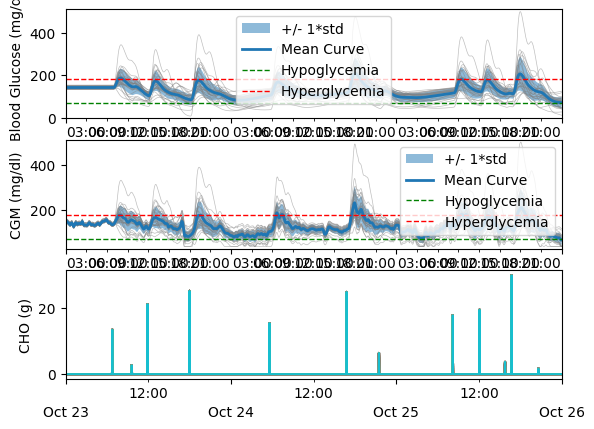

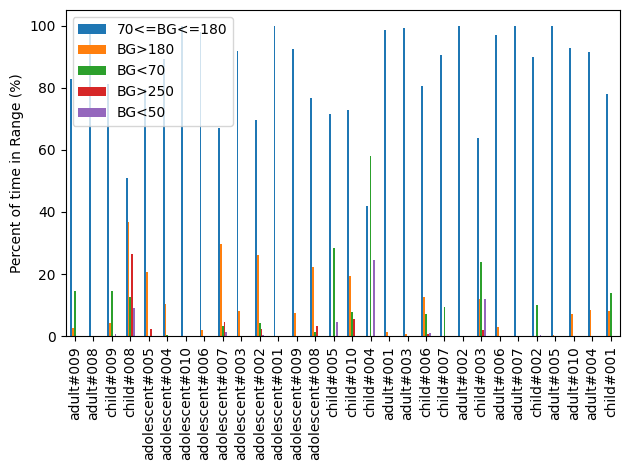

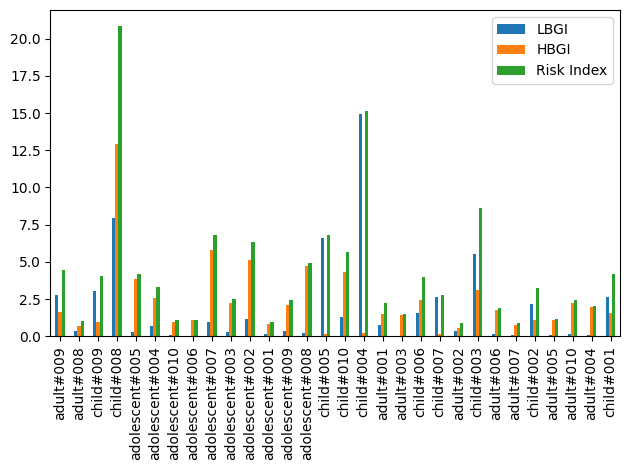

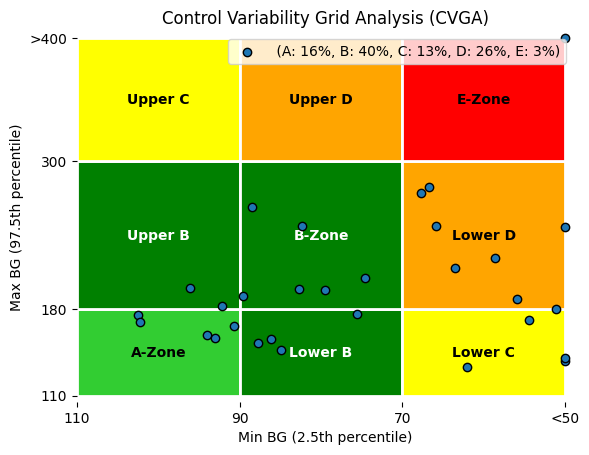

PosixPath('results/basal_bolus/analysis')

In [6]:
sg_analyze(predict_path, analysis_path)

## PID Controller

In [8]:
from simglucose.controller.pid_ctrller import PIDController
from pathlib import Path

base_path = Path.cwd() / "results" / "pid"
predict_path = base_path / "predict"
analysis_path = base_path / "analysis"

controller = PIDController(P=0.0005, I=0, D=0.05, target=140)

sim_objs = generate_sim_objs(sim_time=sim_time, start_time=start_time, patients=patients, controller=controller, save_path=predict_path)

batch_sim(sim_objs, parallel=True)

Simulation took 286.1051697731018 sec.


[                             BG         CGM  CHO   insulin  LBGI      HBGI  \
 Time                                                                         
 2025-10-23 00:00:00  149.020000  165.793949  0.0  2.718442   0.0  2.755276   
 2025-10-23 00:03:00  149.019994  161.582017  0.0  0.000000   0.0  2.755275   
 2025-10-23 00:06:00  149.019617  159.239101  0.0  0.000000   0.0  2.755225   
 2025-10-23 00:09:00  149.015873  157.469903  0.0  0.000000   0.0  2.754731   
 2025-10-23 00:12:00  149.000210  156.094776  0.0  0.000000   0.0  2.752666   
 ...                         ...         ...  ...       ...   ...       ...   
 2025-10-25 23:48:00  125.526908  124.669012  0.0  0.000000   0.0  0.416562   
 2025-10-25 23:51:00  126.144456  123.236070  0.0  0.000000   0.0  0.454808   
 2025-10-25 23:54:00  126.774741  122.122316  0.0  0.000000   0.0  0.495373   
 2025-10-25 23:57:00  127.416823  121.646706  0.0  0.000000   0.0  0.538262   
 2025-10-26 00:00:00  128.069946  121.945875  NaN   

### Run analysis

/Volumes/External SSD/UW/BGC/rl-insulin-pump/scripts/notebooks/results/pid/analysis
                                         BG         CGM  CHO  insulin   LBGI  \
          Time                                                                 
adult#009 2025-10-23 00:00:00  1.450800e+02  161.853949  0.0   2.6508    0.0   
          2025-10-23 00:03:00  1.450800e+02  157.642016  0.0   0.0000    0.0   
          2025-10-23 00:06:00  1.450796e+02  155.299082  0.0   0.0000    0.0   
          2025-10-23 00:09:00  1.450759e+02  153.529915  0.0   0.0000    0.0   
          2025-10-23 00:12:00  1.450617e+02  152.155761  0.0   0.0000    0.0   
...                                     ...         ...  ...      ...    ...   
child#001 2025-10-25 23:48:00 -5.315216e-12   39.000000  0.0   0.0000  100.0   
          2025-10-25 23:51:00 -5.315216e-12   39.000000  0.0   0.0000  100.0   
          2025-10-25 23:54:00 -5.315216e-12   39.000000  0.0   0.0000  100.0   
          2025-10-25 23:57:00 -5.315

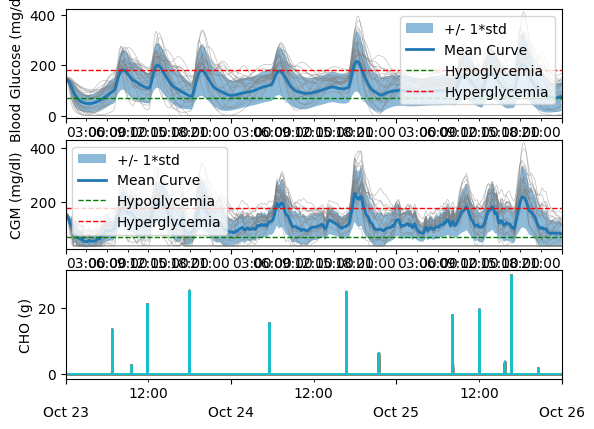

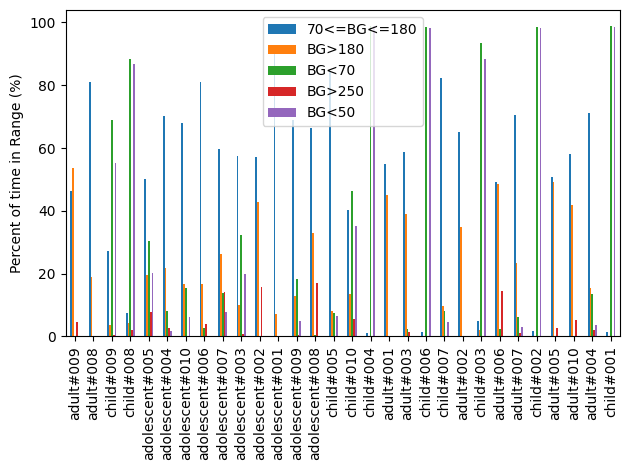

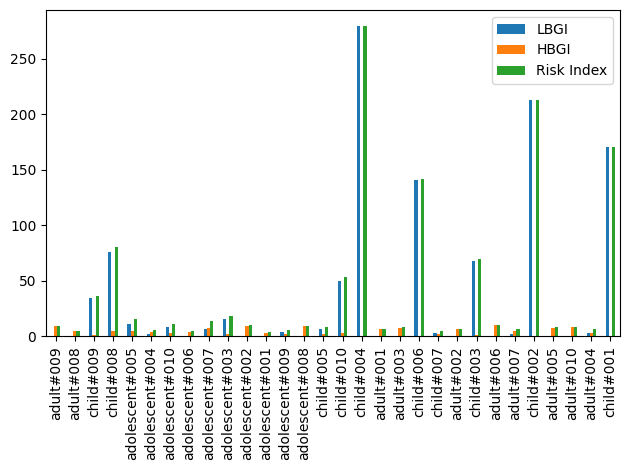

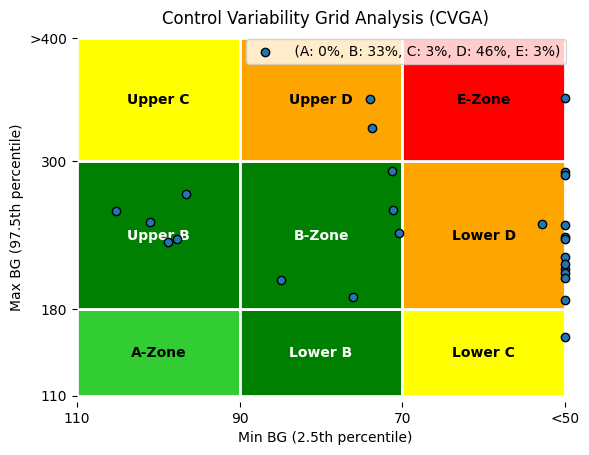

PosixPath('/Volumes/External SSD/UW/BGC/rl-insulin-pump/scripts/notebooks/results/pid/analysis')

In [9]:
sg_analyze(predict_path, analysis_path)